In [1]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
#file_id = '1J05tsCBwdhEwkXygcbpKNztsXA6qErPC'
#downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [2]:
!pip install twitterscraper
!pip install vaderSentiment
!pip install langdetect

     |████████████████████████████████| 92kB 3.7MB/s 
  Created wheel for twitterscraper: filename=twitterscraper-1.6.1-cp36-none-any.whl size=11349 sha256=73e6f4253bd0a7a72437b3efaa3551ba7cfa9c04bb294a978fcb8b4014d56f40
  Stored in directory: /root/.cache/pip/wheels/1a/50/a0/808fd6df0ac14c168b73874056a1ca52e4d88c0c1ecedd4e48
Successfully built twitterscraper
     |████████████████████████████████| 133kB 2.8MB/s 
     |████████████████████████████████| 983kB 2.8MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=9a5d727dd6e88e4a9f41cfce808bc58e0d66b7cc15ea8f5a60bc44e791481cac
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [3]:
#Importing the relevent libraries
import pandas as pd 
import datetime as dt 
from twitterscraper import query_tweets
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from langdetect import detect 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
begin_date = dt.date(2018,1,1)
end_date = dt.date(2020,3,26)
limit = 100000
lang = 'english'


In [6]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data/
#!cat '/gdrive/My Drive/Morgan Stanley Project/Data and Notebook/pretty_ms_tweets.json'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive/
/gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data


In [7]:
#tweets = query_tweets("morganstanley", begindate = begin_date, enddate = end_date, limit = limit, lang = lang)


In [8]:
#Transforming it into a dataframe
#df = pd.DataFrame(t.__dict__ for t in tweets)
#Saving a file
#df.to_csv('TwitterData.csv')

In [9]:
#Importing Various twitter data
# all JP files
#Complaint
df_com = pd.read_json('pretty_jp_tweets_complaint.json')

#Feedback
df_feed = pd.read_json('pretty_jp_tweets_feedback.json')

#Request
df_req = pd.read_json('pretty_jp_tweets_request.json')


In [10]:
df = pd.concat([df_com,df_feed,df_req])

In [11]:
#Sentiment Analysis
#Vader Sentiment

In [12]:
analyzer = SentimentIntensityAnalyzer()

In [13]:
sentiment = df['text'].apply(lambda x: analyzer.polarity_scores(x))

In [14]:
#Inserting the sentiment into the dataframe
df = pd.concat([df, sentiment.apply(pd.Series)],1)

In [15]:
#df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [16]:
df['date'] = df['timestamp'].apply(lambda x: x.date())

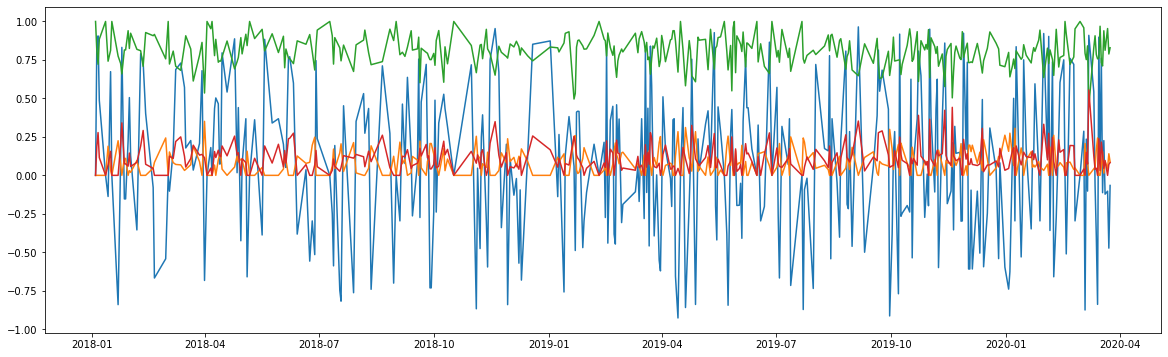

In [17]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(df.groupby('date').mean()['compound'].index, df.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(df.groupby('date').mean()['neg'].index, df.groupby('date').mean()['neg'].values)
plt.plot(df.groupby('date').mean()['neu'].index, df.groupby('date').mean()['neu'].values)
plt.plot(df.groupby('date').mean()['pos'].index, df.groupby('date').mean()['pos'].values)

In [18]:
df['text'].iloc[0]
#As we can see, several of the tweets captures donot refer to morgan stanley. Hence we need to filter out these tweets

'In the Employment Racial Discrimination & #Retaliation #lawsuit - Lue v. JPMorgan Chase & Co. et al, I’m not the kind of person 2 go & find #racism under a rock but if it is blatant, I will #TakeAStance.\nSee the opening paragraph of my Complaint 2 the #EEOC against #JPMorganChasepic.twitter.com/34C8pAsT7u'

In [19]:
Filter = df['text'].apply(lambda x: 'jp' in x.lower())
df_filter = df[Filter]
df_filter.shape
df_filter['text'].iloc[0]

'In the Employment Racial Discrimination & #Retaliation #lawsuit - Lue v. JPMorgan Chase & Co. et al, I’m not the kind of person 2 go & find #racism under a rock but if it is blatant, I will #TakeAStance.\nSee the opening paragraph of my Complaint 2 the #EEOC against #JPMorganChasepic.twitter.com/34C8pAsT7u'

Text(0, 0.5, 'Sentiment')

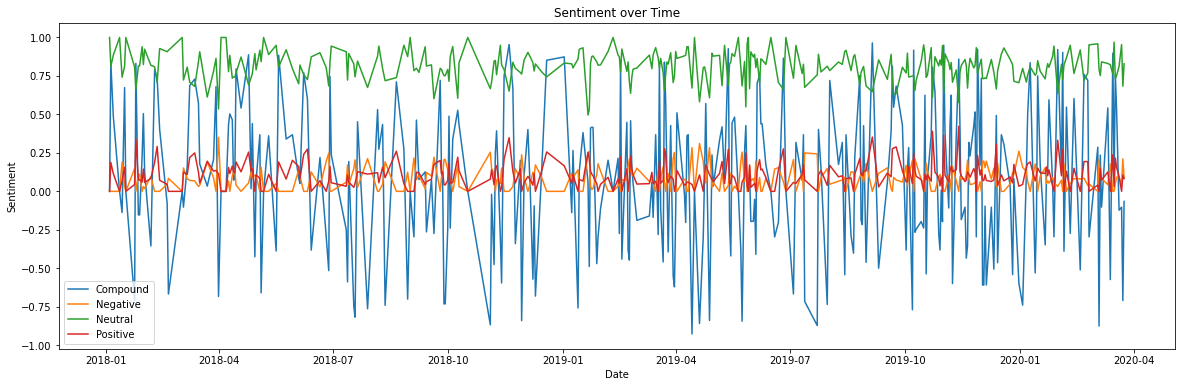

In [20]:
plt.figure(figsize = (20,6))
plt.plot(df_filter.groupby('date').mean()['compound'].index, df_filter.groupby('date').mean()['compound'].values, label = 'Compound')
plt.plot(df_filter.groupby('date').mean()['neg'].index, df_filter.groupby('date').mean()['neg'].values, label = 'Negative')
plt.plot(df_filter.groupby('date').mean()['neu'].index, df_filter.groupby('date').mean()['neu'].values, label = 'Neutral')
plt.plot(df_filter.groupby('date').mean()['pos'].index, df_filter.groupby('date').mean()['pos'].values, label = 'Positive')

plt.legend(loc = 'best')
plt.title('Sentiment over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment')

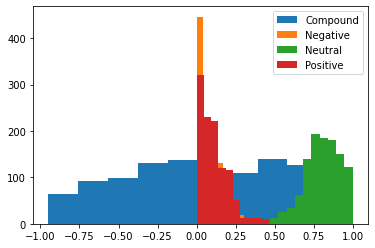

In [21]:

plt.hist(df_filter['compound'].values, label = 'Compound')
plt.hist(df_filter['neg'].values, label = 'Negative')
plt.hist(df_filter['neu'].values, label = 'Neutral')
plt.hist(df_filter['pos'].values, label = 'Positive')

plt.legend(loc = 'best')

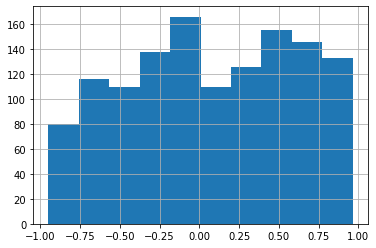

In [22]:
df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [23]:
df.iloc[:,-4:-1]

,neu,pos,compound
0,0.876,0.000,-0.7003
1,0.719,0.089,-0.7405
2,0.807,0.102,0.1049
3,0.675,0.112,-0.7627
4,0.876,0.000,-0.7003
...,...,...,...
518,0.776,0.224,0.8442
519,0.927,0.073,0.0516
520,0.884,0.000,-0.5775
521,0.812,0.081,-0.2960


In [26]:
#Importing Various twitter data
# all JP files
#Complaint
df_com = pd.read_json('pretty_jp_tweets_complaint.json')

#Feedback
df_feed = pd.read_json('pretty_jp_tweets_feedback.json')

#Request
df_req = pd.read_json('pretty_jp_tweets_request.json')


In [27]:
df = pd.concat([df_com,df_feed,df_req])

In [28]:
#LDAVIS
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

     |████████████████████████████████| 1.6MB 2.5MB/s 
     |████████████████████████████████| 552kB 17.3MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=335ecafb964abf35c824ef2d3dc4c5fd61dc0d1301537dd618f722807b100250
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=08a92d3b2176a2e67aaa68f575cffdee7ba3dbc50ef940dbb82cf1b10d4bb6c1
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [29]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [30]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)

dtm_tf = tf_vectorizer.fit_transform(df['text'].values)
print(dtm_tf.shape)

(1280, 485)


In [31]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

In [32]:
#dtm_tfidf = tfidf_vectorizer.fit_transform(df['text'].values)
#lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
#lda_tfidf.fit(dtm_tfidf)
#pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

In [33]:
sentiment_wm = df['text'].apply(lambda x: analyzer.polarity_scores(x))
df = pd.concat([df, sentiment_wm.apply(pd.Series)],1)

In [34]:
df.head()

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,neg,neu,pos,compound
0,True,"[Retaliation, lawsuit, racism, TakeAStance, EE...",[https://pbs.twimg.com/media/Dl2AmSoV4Acz-BE.jpg],False,False,0,[],,0,[],0,Candice_Lue,In the Employment Racial Discrimination & #Ret...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-30 11:20:00,2018-08-30 11:20:00,1035124975764754432,/Candice_Lue/status/1035124975764754432,827318424904794112,Candice Lue,,0.124,0.876,0.000,-0.7003
1,False,[],[],False,True,1,[],1028362938787262465,0,"[{'screen_name': 'NurseRabbi', 'user_id': '307...",0,NurseRabbi,Banks not compliant! @JPMorgan_UK chase! No ex...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-12 18:11:16,2018-08-12 18:11:16,1028705490887421952,/NurseRabbi/status/1028705490887421953,3075653521,Nurse Rabbi,,0.192,0.719,0.089,-0.7405
2,False,[],[],False,False,2,[http://www.artfixdaily.com/news_feed/2018/08/...,,0,[],0,andthatrhymeswi,The US foolishly levied tariffs on art in the ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-10 13:57:15,2018-08-10 13:57:15,1027916790314229760,/andthatrhymeswi/status/1027916790314229760,133266548,Albert Henderson,,0.091,0.807,0.102,0.1049
3,False,[],[],True,False,0,[https://www.vanityfair.com/news/2017/09/jamie...,,1,[],0,NeedaHobby1,2013: JP Morgan Chase reached a record settlem...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-07-29 20:06:39,2018-07-29 20:06:39,1023661100913459200,/NeedaHobby1/status/1023661100913459200,195195397,Need A Hobby,,0.213,0.675,0.112,-0.7627
4,True,"[Retaliation, lawsuit, racism, TakeAStance, EE...",[https://pbs.twimg.com/media/Dl2AmSoV4Acz-BE.jpg],False,False,0,[],,0,[],0,Candice_Lue,In the Employment Racial Discrimination & #Ret...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-30 11:20:00,2018-08-30 11:20:00,1035124975764754432,/Candice_Lue/status/1035124975764754432,827318424904794112,Candice Lue,,0.124,0.876,0.000,-0.7003


In [35]:
df_pos = df[df['compound'] >= 0.05]
df_neg = df[df['compound'] <= -0.05]
df_neu = df[( df['compound'] < 0.05 ) & ( df['compound'] > -0.05 )]


In [36]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_pos['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.005328 -0.040263       1        1  14.708112
2      0.052882 -0.141237       2        1  12.430447
8      0.024837 -0.011015       3        1  12.029866
5      0.142760  0.078077       4        1  11.258123
9     -0.033504  0.084198       5        1   9.983983
7     -0.319495 -0.012206       6        1   9.960583
4     -0.007135 -0.063671       7        1   9.625541
1      0.065197 -0.127605       8        1   7.196320
0      0.004535  0.191480       9        1   7.120547
6      0.064594  0.042243      10        1   5.686477, topic_info=         Term       Freq      Total Category  logprob  loglift
74   feedback  44.000000  44.000000  Default  30.0000  30.0000
146       new  11.000000  11.000000  Default  29.0000  29.0000
37        com  45.000000  45.000000  Default  28.0000  28.0000
204   twitter  36.000000  36.000000  Default  27.0000  27.0000
153    people  10.000000  10.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
169  requests   1.298962  14.224606  Topic10  -4.3255   0.4737
168   request   2.538426  46.253862  Topic10  -3.6555  -0.0355
204   twitter   2.172145  36.400205  Topic10  -3.8114   0.0482
37        com   2.013199  45.541953  Topic10  -3.8873  -0.2518
144    morgan   2.004115  50.877300  Topic10  -3.8919  -0.3671

[408 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
0         2  0.179209      account
0         6  0.716838      account
1         1  0.707926       action
1         3  0.141585       action
2         1  0.750936  affiliation
...     ...       ...          ...
217       2  0.175252          yes
217       4  0.175252          yes
217       5  0.175252          yes
217       7  0.350504          yes
217       9  0.175252          yes

[623 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 9, 6, 10, 8, 5, 2, 1, 7])

In [37]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_neg['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.164935  0.028755       1        1  13.707970
8      0.039482 -0.026939       2        1  12.588486
5      0.000557  0.231744       3        1  11.743765
6     -0.022716 -0.048345       4        1  11.391107
9      0.039636  0.023480       5        1  10.047362
0      0.147996 -0.137235       6        1  10.030939
4      0.074719  0.053521       7        1   9.288696
7     -0.111229 -0.184923       8        1   8.563978
3     -0.168131  0.065725       9        1   7.697622
2     -0.165250 -0.005785      10        1   4.940075, topic_info=               Term       Freq      Total Category  logprob  loglift
130         request  37.000000  37.000000  Default  30.0000  30.0000
105        mortgage  12.000000  12.000000  Default  29.0000  29.0000
12              bit  13.000000  13.000000  Default  28.0000  28.0000
47   discrimination  13.000000  13.000000  Default  27.0000  27.0000
7              bank  25.000000  25.000000  Default  26.0000  26.0000
..              ...        ...        ...      ...      ...      ...
62             file   0.107260  12.501432  Topic10  -6.3693  -1.7505
170           years   0.107257   4.738412  Topic10  -6.3693  -0.7804
161         waiting   0.107254   4.032516  Topic10  -6.3693  -0.6192
151            time   0.107251   9.308741  Topic10  -6.3694  -1.4558
28            chase   0.107250  34.582200  Topic10  -6.3694  -2.7681

[394 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.128977  accounts
0         2  0.128977  accounts
0         3  0.257954  accounts
0         5  0.515907  accounts
1         8  0.574177   accused
...     ...       ...       ...
169       9  0.158400       www
170       1  0.211041     years
170       5  0.633124     years
171       5  0.398336      york
171       9  0.597503      york

[469 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 9, 6, 7, 10, 1, 5, 8, 4, 3])

In [38]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_neu['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.236340  0.039403       1        1  24.259736
5      0.197106  0.112323       2        1  12.738734
9      0.188176  0.196048       3        1  11.886645
7      0.038410 -0.182872       4        1  10.886072
1     -0.098131  0.200060       5        1   9.945688
6      0.215579 -0.138817       6        1   8.676566
4     -0.104781  0.015944       7        1   6.831253
8      0.096260 -0.122040       8        1   6.153710
3     -0.210809 -0.079954       9        1   5.319764
2     -0.085470 -0.040094      10        1   3.301832, topic_info=        Term       Freq      Total Category  logprob  loglift
20   request  29.000000  29.000000  Default  27.0000  27.0000
10  feedback  14.000000  14.000000  Default  26.0000  26.0000
21  requests   9.000000   9.000000  Default  25.0000  25.0000
4      chase  15.000000  15.000000  Default  24.0000  24.0000
15    morgan  11.000000  11.000000  Default  23.0000  23.0000
..       ...        ...        ...      ...      ...      ...
10  feedback   0.303803  14.749929  Topic10  -3.2958  -0.4719
4      chase   0.303803  15.162241  Topic10  -3.2958  -0.4995
12     https   0.303803  16.247031  Topic10  -3.2958  -0.5686
25   twitter   0.303803  16.358910  Topic10  -3.2958  -0.5755
20   request   0.303803  29.369268  Topic10  -3.2958  -1.1606

[297 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         4  0.889492       bank
1         1  0.817902     bankia
2         1  0.237487        bit
2         7  0.474975        bit
2         8  0.118744        bit
3         1  0.748237      bolsa
4         4  0.395720      chase
4         6  0.395720      chase
4         8  0.131907      chase
5         2  0.133677  complaint
5         4  0.802059  complaint
6         1  0.748237     cuando
7         1  0.887668        del
8         1  0.887668       dice
9         1  0.887668        era
10        1  0.203391   feedback
10        5  0.677969   feedback
11        1  0.297001       http
11        7  0.495002       http
11        8  0.099000       http
12        2  0.553947      https
12        3  0.061550      https
12        5  0.061550      https
12        6  0.184649      https
12        8  0.061550      https
13        1  0.817902     juicio
14        1  0.887668    mercado
15        4  0.270515     morgan
15        5  0.270515     morgan
15        9  0.360687     morgan
16        1  0.748237   negativo
17        6  0.872245        new
18        3  0.437851        pic
18        4  0.087570        pic
18        5  0.350281        pic
19        1  0.887668        que
20        2  0.170246    request
20        3  0.578836    request
20        4  0.034049    request
20        6  0.102148    request
20        7  0.034049    request
20        8  0.102148    request
21        7  0.209430   requests
21        9  0.628289   requests
22        1  0.748237      salio
23        4  0.261065    service
23        8  0.652662    service
24        2  0.767168     status
25        1  0.061129    twitter
25        2  0.122258    twitter
25        3  0.366773    twitter
25        4  0.061129    twitter
25        5  0.244515    twitter
25        7  0.122258    twitter
26        1  0.098029        www
26        2  0.784233        www, R=27, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 10, 8, 2, 7, 5, 9, 4, 3])

In [39]:
print(df_pos.shape)
print(df_neg.shape)
print(df_neu.shape)

(651, 25)
(498, 25)
(131, 25)
